### Testing step sizes for gradient descent in linear regression

In [6]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from PIL import Image

import random
from numpy import linalg as la
from scipy.sparse.linalg import svds, eigs
import math

p = 1000  # Ambient dimension
n = 1000  # Number of samples

# Generate a p-dimensional zero vector
x_star = np.random.randn(p)
# Normalize
x_star = (1 / la.norm(x_star, 2)) * x_star

# Well-conditioned matrix A
A = np.random.randn(n, p)
[U, S, V] = la.svd(A)
S = np.linspace(1, 2, n)
S = np.diag(S)
A = U.dot(S.dot(V.T))

y = A.dot(x_star)

# Print condition number of A
print(la.cond(A))

# Compute largest singular value of A
U,S,V = la.svd(A)
L = max(S)**2
mu = min(S)**2

# eta = 1/s**2
# print(eta)

1.9999999999999996


In [7]:
def GD(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    
    At = np.transpose(A)   # Transpose of A

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = -At @ (y - A @ x_new)
    
        # Perform gradient step
        x_new = x_old - eta * grad        
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list

def f(y, A, x):
    return 0.5 * math.pow(la.norm(y - A @ x, 2), 2)

iter# = 0, ||x_new - x_old||_2 = 0.24485601961627226
iter# = 1, ||x_new - x_old||_2 = 0.17553701128699276
iter# = 2, ||x_new - x_old||_2 = 0.12883423671961394
iter# = 3, ||x_new - x_old||_2 = 0.09678837857520074
iter# = 4, ||x_new - x_old||_2 = 0.07433497703353828
iter# = 5, ||x_new - x_old||_2 = 0.058242345246362105
iter# = 6, ||x_new - x_old||_2 = 0.046438388411138024
iter# = 7, ||x_new - x_old||_2 = 0.037583759362487375
iter# = 8, ||x_new - x_old||_2 = 0.0308021932427689
iter# = 9, ||x_new - x_old||_2 = 0.025511092260831765
iter# = 10, ||x_new - x_old||_2 = 0.02131556595504038
iter# = 11, ||x_new - x_old||_2 = 0.017942211788219045
iter# = 12, ||x_new - x_old||_2 = 0.015197557487663525
iter# = 13, ||x_new - x_old||_2 = 0.012941736682842538
iter# = 14, ||x_new - x_old||_2 = 0.011071583642283167
iter# = 15, ||x_new - x_old||_2 = 0.00950959070424708
iter# = 16, ||x_new - x_old||_2 = 0.008196556559088694
iter# = 17, ||x_new - x_old||_2 = 0.007086593213423212
iter# = 18, ||x_new - x_old||

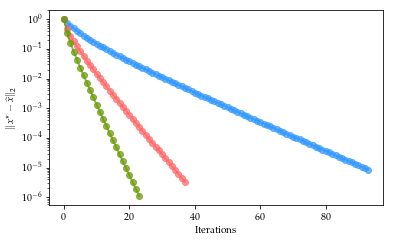

In [19]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

eta_constant = 0.1
eta_optimal = 1/L
eta_more_optimal = 2/(mu + L)

x_GD1, x_list_GD1, f_list_GD1 = GD(y, A, eta_constant, iters, epsilon, True, x_star)
x_GD2, x_list_GD2, f_list_GD2 = GD(y, A, eta_optimal, iters, epsilon, True, x_star)
x_GD3, x_list_GD3, f_list_GD3 = GD(y, A, eta_more_optimal, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD1 = range(len(x_list_GD1))
xs_GD2 = range(len(x_list_GD2))
xs_GD3 = range(len(x_list_GD3))

plt.plot(xs_GD1, x_list_GD1, '-o', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_GD2, x_list_GD2, '-o', color = '#FF6666', linewidth = 2, alpha = 0.7)
plt.plot(xs_GD3, x_list_GD3, '-o', color = '#669900', linewidth = 2, alpha = 0.7)
# plt.plot(xs_HB, x_list_HB, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)
# plt.plot(xs_Nest1, x_list_Nest1, '-', color = '#669900', linewidth = 2, alpha = 0.7)
# plt.plot(xs_Nest2, x_list_Nest2, '-', color = '#660099', linewidth = 2, alpha = 0.7)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

In [26]:
def GD(y, A, eta, iters, x_init, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = x_init    # Initial estimate    
    At = np.transpose(A)   # Transpose of A

    x_list, f_list = [la.norm(x_new - x_star)], [f(y, A, x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = -At @ (y - A @ x_new)
    
        # Perform gradient step
        x_new = x_old - eta * grad        
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list

def f(y, A, x):
    return 0.5 * math.pow(la.norm(y - A @ x, 2), 2)

iter# = 0, ||x_new - x_old||_2 = 0.9794240784650898
iter# = 1, ||x_new - x_old||_2 = 0.3351517700178266
iter# = 2, ||x_new - x_old||_2 = 0.15445718417544624
iter# = 3, ||x_new - x_old||_2 = 0.07775582273511655
iter# = 4, ||x_new - x_old||_2 = 0.040816667547116936
iter# = 5, ||x_new - x_old||_2 = 0.021947698025322485
iter# = 6, ||x_new - x_old||_2 = 0.011987398583642039
iter# = 7, ||x_new - x_old||_2 = 0.006620261839046341
iter# = 8, ||x_new - x_old||_2 = 0.0036870773705904606
iter# = 9, ||x_new - x_old||_2 = 0.002067364266162109
iter# = 10, ||x_new - x_old||_2 = 0.0011657089134557257
iter# = 11, ||x_new - x_old||_2 = 0.0006604699708729642
iter# = 12, ||x_new - x_old||_2 = 0.0003757885228487989
iter# = 13, ||x_new - x_old||_2 = 0.00021461200813703758
iter# = 14, ||x_new - x_old||_2 = 0.00012297417851355879
iter# = 15, ||x_new - x_old||_2 = 7.06770529322115e-05
iter# = 16, ||x_new - x_old||_2 = 4.073070344215836e-05
iter# = 17, ||x_new - x_old||_2 = 2.3530642375977996e-05
iter# = 18, ||x

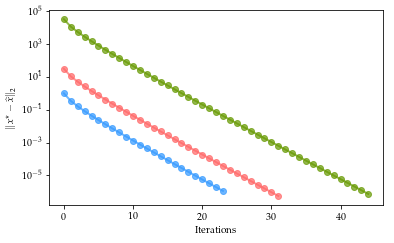

In [27]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

eta_more_optimal = 2/(mu + L)

x_init = np.zeros(p)
x_init2 = np.ones(p)
x_init3 = 10**3 * np.random.randn(p)

x_GD1, x_list_GD1, f_list_GD1 = GD(y, A, eta_more_optimal, iters, x_init, epsilon, True, x_star)
x_GD2, x_list_GD2, f_list_GD2 = GD(y, A, eta_more_optimal, iters, x_init2, epsilon, True, x_star)
x_GD3, x_list_GD3, f_list_GD3 = GD(y, A, eta_more_optimal, iters, x_init3, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_GD1 = range(len(x_list_GD1))
xs_GD2 = range(len(x_list_GD2))
xs_GD3 = range(len(x_list_GD3))

plt.plot(xs_GD1, x_list_GD1, '-o', color = '#3399FF', linewidth = 2, alpha = 0.7)
plt.plot(xs_GD2, x_list_GD2, '-o', color = '#FF6666', linewidth = 2, alpha = 0.7)
plt.plot(xs_GD3, x_list_GD3, '-o', color = '#669900', linewidth = 2, alpha = 0.7)
# plt.plot(xs_HB, x_list_HB, '-', color = '#FF6666', linewidth = 2, alpha = 0.7)
# plt.plot(xs_Nest1, x_list_Nest1, '-', color = '#669900', linewidth = 2, alpha = 0.7)
# plt.plot(xs_Nest2, x_list_Nest2, '-', color = '#660099', linewidth = 2, alpha = 0.7)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

### Momentum parameter

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from PIL import Image

import random
from numpy import linalg as la
from scipy.sparse.linalg import svds, eigs
import math

p = 1000  # Ambient dimension
n = 1000  # Number of samples

# Generate a p-dimensional zero vector
x_star = np.random.randn(p)
# Normalize
x_star = (1 / la.norm(x_star, 2)) * x_star

# Well-conditioned matrix A
A = np.random.randn(n, p)
[U, S, V] = la.svd(A)
S = np.linspace(1, 5, n)
S = np.diag(S)
A = U.dot(S.dot(V.T))

y = A.dot(x_star)

# Print condition number of A
print(la.cond(A))

# Compute largest singular value of A
U,S,V = la.svd(A)
L = max(S)**2
mu = min(S)**2

# eta = 1/s**2
# print(eta)

4.999999999999993


In [2]:
def Nesterov1(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_prev = np.zeros(p)   # Initial estimate    
    x_cur = np.zeros(p)    # Initial estimate    
    y_cur = np.zeros(p)
    At = np.transpose(A)   # Transpose of A
    
    theta_cur = 1
    
    x_list, f_list = [1], [f(y, A, x_cur)]

    for i in range(iters):
        x_prev = x_cur
    
        # Compute gradient
        grad = -At @ (y - A @ y_cur)
    
        # Perform gradient step
        x_cur = y_cur - eta * grad
        
        # Perform the extrapolation step
        theta_prev = theta_cur
        theta_cur = (1 + np.sqrt(1 + 4*theta_prev**2))/2
        beta = (theta_prev - 1)/theta_cur
        
        y_cur = x_cur + beta * (x_cur - x_prev)
    
        if (la.norm(x_cur - x_prev, 2) / la.norm(x_cur, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_cur - x_star, 2))
        f_list.append(f(y, A, x_cur))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_cur - x_prev, 2)))
    
    print("Number of steps:", len(f_list))
    return x_cur, x_list, f_list

In [3]:
def Nesterov2(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_prev = np.zeros(p)   # Initial estimate    
    x_cur = np.zeros(p)    # Initial estimate    
    y_cur = np.zeros(p)
    At = np.transpose(A)   # Transpose of A
    
    x_list, f_list = [1], [f(y, A, x_cur)]

    for i in range(iters):
        x_prev = x_cur
    
        # Compute gradient
        grad = -At @ (y - A @ y_cur)
    
        # Perform gradient step
        x_cur = y_cur - eta * grad
        
        # Perform the extrapolation step
        beta = i / (i + 3)
        
        y_cur = x_cur + beta * (x_cur - x_prev)
    
        if (la.norm(x_cur - x_prev, 2) / la.norm(x_cur, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_cur - x_star, 2))
        f_list.append(f(y, A, x_cur))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_cur - x_prev, 2)))
    
    print("Number of steps:", len(f_list))
    return x_cur, x_list, f_list

In [4]:
def Nesterov3(y, A, eta, L, mu, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_prev = np.zeros(p)   # Initial estimate    
    x_cur = np.zeros(p)    # Initial estimate    
    y_cur = np.zeros(p)
    At = np.transpose(A)   # Transpose of A
    
    beta = (np.sqrt(L) - np.sqrt(mu))/(np.sqrt(L) + np.sqrt(mu))
    
    x_list, f_list = [1], [f(y, A, x_cur)]

    for i in range(iters):
        x_prev = x_cur
    
        # Compute gradient
        grad = -At @ (y - A @ y_cur)
    
        # Perform gradient step
        x_cur = y_cur - eta * grad
        
        # Perform the extrapolation step
        y_cur = x_cur + beta * (x_cur - x_prev)
    
        if (la.norm(x_cur - x_prev, 2) / la.norm(x_cur, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_cur - x_star, 2))
        f_list.append(f(y, A, x_cur))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_cur - x_prev, 2)))
    
    print("Number of steps:", len(f_list))
    return x_cur, x_list, f_list

iter# = 0, ||x_new - x_old||_2 = 0.012422514851498395
iter# = 1, ||x_new - x_old||_2 = 0.012205648071158537
iter# = 2, ||x_new - x_old||_2 = 0.015372410713303742
iter# = 3, ||x_new - x_old||_2 = 0.018283293230031812
iter# = 4, ||x_new - x_old||_2 = 0.020952948091075105
iter# = 5, ||x_new - x_old||_2 = 0.023381644782866955
iter# = 6, ||x_new - x_old||_2 = 0.025565379639744066
iter# = 7, ||x_new - x_old||_2 = 0.027499577708573215
iter# = 8, ||x_new - x_old||_2 = 0.02918073856776168
iter# = 9, ||x_new - x_old||_2 = 0.03060724657557931
iter# = 10, ||x_new - x_old||_2 = 0.031779778820762015
iter# = 11, ||x_new - x_old||_2 = 0.03270149100181563
iter# = 12, ||x_new - x_old||_2 = 0.03337806584619332
iter# = 13, ||x_new - x_old||_2 = 0.03381766812906767
iter# = 14, ||x_new - x_old||_2 = 0.034030831585650304
iter# = 15, ||x_new - x_old||_2 = 0.03403029369343305
iter# = 16, ||x_new - x_old||_2 = 0.033830789366944856
iter# = 17, ||x_new - x_old||_2 = 0.03344881180089321
iter# = 18, ||x_new - x_old

iter# = 175, ||x_new - x_old||_2 = 0.0011404221226286814
iter# = 176, ||x_new - x_old||_2 = 0.0011280310555442023
iter# = 177, ||x_new - x_old||_2 = 0.0011160308563568284
iter# = 178, ||x_new - x_old||_2 = 0.0011044369064909
iter# = 179, ||x_new - x_old||_2 = 0.001093255478177783
iter# = 180, ||x_new - x_old||_2 = 0.0010824842891405365
iter# = 181, ||x_new - x_old||_2 = 0.0010721131865795268
iter# = 182, ||x_new - x_old||_2 = 0.0010621248754278105
iter# = 183, ||x_new - x_old||_2 = 0.001052495626298072
iter# = 184, ||x_new - x_old||_2 = 0.001043195923898988
iter# = 185, ||x_new - x_old||_2 = 0.001034191043525303
iter# = 186, ||x_new - x_old||_2 = 0.001025441568151593
iter# = 187, ||x_new - x_old||_2 = 0.0010169038787795433
iter# = 188, ||x_new - x_old||_2 = 0.0010085306638795283
iter# = 189, ||x_new - x_old||_2 = 0.0010002714988814867
iter# = 190, ||x_new - x_old||_2 = 0.000992073543595309
iter# = 191, ||x_new - x_old||_2 = 0.0009838823950263878
iter# = 192, ||x_new - x_old||_2 = 0.000

iter# = 366, ||x_new - x_old||_2 = 0.0002773925889110381
iter# = 367, ||x_new - x_old||_2 = 0.00027496426606515937
iter# = 368, ||x_new - x_old||_2 = 0.00027259275354614686
iter# = 369, ||x_new - x_old||_2 = 0.00027028500581701586
iter# = 370, ||x_new - x_old||_2 = 0.0002680467667609496
iter# = 371, ||x_new - x_old||_2 = 0.0002658825463680577
iter# = 372, ||x_new - x_old||_2 = 0.0002637956220618186
iter# = 373, ||x_new - x_old||_2 = 0.00026178806391249926
iter# = 374, ||x_new - x_old||_2 = 0.00025986078237530993
iter# = 375, ||x_new - x_old||_2 = 0.00025801359660021977
iter# = 376, ||x_new - x_old||_2 = 0.00025624532081931116
iter# = 377, ||x_new - x_old||_2 = 0.0002545538658549952
iter# = 378, ||x_new - x_old||_2 = 0.0002529363524338323
iter# = 379, ||x_new - x_old||_2 = 0.0002513892327557476
iter# = 380, ||x_new - x_old||_2 = 0.0002499084166680644
iter# = 381, ||x_new - x_old||_2 = 0.0002484893988311508
iter# = 382, ||x_new - x_old||_2 = 0.00024712738343219787
iter# = 383, ||x_new - 

iter# = 564, ||x_new - x_old||_2 = 0.00010943278057633502
iter# = 565, ||x_new - x_old||_2 = 0.00010905188256711093
iter# = 566, ||x_new - x_old||_2 = 0.00010870248733306457
iter# = 567, ||x_new - x_old||_2 = 0.00010838206423801057
iter# = 568, ||x_new - x_old||_2 = 0.00010808789726742057
iter# = 569, ||x_new - x_old||_2 = 0.00010781714020395932
iter# = 570, ||x_new - x_old||_2 = 0.00010756687160681055
iter# = 571, ||x_new - x_old||_2 = 0.00010733414834428138
iter# = 572, ||x_new - x_old||_2 = 0.00010711605655573768
iter# = 573, ||x_new - x_old||_2 = 0.00010690975907081586
iter# = 574, ||x_new - x_old||_2 = 0.00010671253848105692
iter# = 575, ||x_new - x_old||_2 = 0.00010652183523245954
iter# = 576, ||x_new - x_old||_2 = 0.00010633528027921886
iter# = 577, ||x_new - x_old||_2 = 0.00010615072200244892
iter# = 578, ||x_new - x_old||_2 = 0.00010596624724879772
iter# = 579, ||x_new - x_old||_2 = 0.00010578019647893167
iter# = 580, ||x_new - x_old||_2 = 0.00010559117313391237
iter# = 581, |

iter# = 753, ||x_new - x_old||_2 = 5.802061669322201e-05
iter# = 754, ||x_new - x_old||_2 = 5.78553073165476e-05
iter# = 755, ||x_new - x_old||_2 = 5.7705281505400815e-05
iter# = 756, ||x_new - x_old||_2 = 5.757050759054994e-05
iter# = 757, ||x_new - x_old||_2 = 5.745089981958725e-05
iter# = 758, ||x_new - x_old||_2 = 5.7346318422085116e-05
iter# = 759, ||x_new - x_old||_2 = 5.7256569194154634e-05
iter# = 760, ||x_new - x_old||_2 = 5.7181402612512936e-05
iter# = 761, ||x_new - x_old||_2 = 5.7120512517933104e-05
iter# = 762, ||x_new - x_old||_2 = 5.707353443661556e-05
iter# = 763, ||x_new - x_old||_2 = 5.704004363338924e-05
iter# = 764, ||x_new - x_old||_2 = 5.70195530123808e-05
iter# = 765, ||x_new - x_old||_2 = 5.701151099750599e-05
iter# = 766, ||x_new - x_old||_2 = 5.7015299536473935e-05
iter# = 767, ||x_new - x_old||_2 = 5.703023237717783e-05
iter# = 768, ||x_new - x_old||_2 = 5.705555376474526e-05
iter# = 769, ||x_new - x_old||_2 = 5.709043770064045e-05
iter# = 770, ||x_new - x_ol

iter# = 948, ||x_new - x_old||_2 = 3.720608526777065e-05
iter# = 949, ||x_new - x_old||_2 = 3.7123518632487945e-05
iter# = 950, ||x_new - x_old||_2 = 3.7035705259535044e-05
iter# = 951, ||x_new - x_old||_2 = 3.694272625288864e-05
iter# = 952, ||x_new - x_old||_2 = 3.6844657267819863e-05
iter# = 953, ||x_new - x_old||_2 = 3.674156960095742e-05
iter# = 954, ||x_new - x_old||_2 = 3.663353190630962e-05
iter# = 955, ||x_new - x_old||_2 = 3.652061247465725e-05
iter# = 956, ||x_new - x_old||_2 = 3.640288200288159e-05
iter# = 957, ||x_new - x_old||_2 = 3.6280416770315347e-05
iter# = 958, ||x_new - x_old||_2 = 3.61533021314279e-05
iter# = 959, ||x_new - x_old||_2 = 3.60216362284363e-05
iter# = 960, ||x_new - x_old||_2 = 3.588553382298512e-05
iter# = 961, ||x_new - x_old||_2 = 3.5745130144016384e-05
iter# = 962, ||x_new - x_old||_2 = 3.560058464815039e-05
iter# = 963, ||x_new - x_old||_2 = 3.545208459009737e-05
iter# = 964, ||x_new - x_old||_2 = 3.529984830323299e-05
iter# = 965, ||x_new - x_old

iter# = 134, ||x_new - x_old||_2 = 0.0016932652756754102
iter# = 135, ||x_new - x_old||_2 = 0.0016806199279747894
iter# = 136, ||x_new - x_old||_2 = 0.0016673601067881886
iter# = 137, ||x_new - x_old||_2 = 0.0016534514890838797
iter# = 138, ||x_new - x_old||_2 = 0.0016388957437132074
iter# = 139, ||x_new - x_old||_2 = 0.0016237276050186681
iter# = 140, ||x_new - x_old||_2 = 0.001608011084564067
iter# = 141, ||x_new - x_old||_2 = 0.0015918348746322794
iter# = 142, ||x_new - x_old||_2 = 0.0015753070346698735
iter# = 143, ||x_new - x_old||_2 = 0.0015585490971478588
iter# = 144, ||x_new - x_old||_2 = 0.001541689778484092
iter# = 145, ||x_new - x_old||_2 = 0.001524858528631151
iter# = 146, ||x_new - x_old||_2 = 0.001508179193549154
iter# = 147, ||x_new - x_old||_2 = 0.0014917640914062097
iter# = 148, ||x_new - x_old||_2 = 0.001475708809639217
iter# = 149, ||x_new - x_old||_2 = 0.0014600880110497245
iter# = 150, ||x_new - x_old||_2 = 0.0014449524906238068
iter# = 151, ||x_new - x_old||_2 = 0

iter# = 320, ||x_new - x_old||_2 = 0.00032846385150645186
iter# = 321, ||x_new - x_old||_2 = 0.00032717046096995866
iter# = 322, ||x_new - x_old||_2 = 0.0003259900482058445
iter# = 323, ||x_new - x_old||_2 = 0.00032491949058518436
iter# = 324, ||x_new - x_old||_2 = 0.00032395535752605597
iter# = 325, ||x_new - x_old||_2 = 0.0003230937495554583
iter# = 326, ||x_new - x_old||_2 = 0.00032233013576059505
iter# = 327, ||x_new - x_old||_2 = 0.00032165919999016193
iter# = 328, ||x_new - x_old||_2 = 0.0003210747059989653
iter# = 329, ||x_new - x_old||_2 = 0.0003205693909249723
iter# = 330, ||x_new - x_old||_2 = 0.0003201348950908696
iter# = 331, ||x_new - x_old||_2 = 0.000319761734224246
iter# = 332, ||x_new - x_old||_2 = 0.0003194393179250689
iter# = 333, ||x_new - x_old||_2 = 0.0003191560157387286
iter# = 334, ||x_new - x_old||_2 = 0.00031889926969311553
iter# = 335, ||x_new - x_old||_2 = 0.0003186557498011808
iter# = 336, ||x_new - x_old||_2 = 0.00031841154696780405
iter# = 337, ||x_new - x

iter# = 506, ||x_new - x_old||_2 = 0.00013632416785002756
iter# = 507, ||x_new - x_old||_2 = 0.00013634184612026763
iter# = 508, ||x_new - x_old||_2 = 0.00013637143890009215
iter# = 509, ||x_new - x_old||_2 = 0.00013640847794704305
iter# = 510, ||x_new - x_old||_2 = 0.00013644862600628284
iter# = 511, ||x_new - x_old||_2 = 0.00013648769663270223
iter# = 512, ||x_new - x_old||_2 = 0.000136521669788745
iter# = 513, ||x_new - x_old||_2 = 0.00013654670382528915
iter# = 514, ||x_new - x_old||_2 = 0.0001365591444879575
iter# = 515, ||x_new - x_old||_2 = 0.00013655553159655647
iter# = 516, ||x_new - x_old||_2 = 0.00013653260402487366
iter# = 517, ||x_new - x_old||_2 = 0.00013648730356636296
iter# = 518, ||x_new - x_old||_2 = 0.0001364167782127206
iter# = 519, ||x_new - x_old||_2 = 0.0001363183853012851
iter# = 520, ||x_new - x_old||_2 = 0.0001361896949073355
iter# = 521, ||x_new - x_old||_2 = 0.0001360284937726709
iter# = 522, ||x_new - x_old||_2 = 0.00013583278997470738
iter# = 523, ||x_new 

iter# = 692, ||x_new - x_old||_2 = 7.30742884391981e-05
iter# = 693, ||x_new - x_old||_2 = 7.296905413618451e-05
iter# = 694, ||x_new - x_old||_2 = 7.285827910579669e-05
iter# = 695, ||x_new - x_old||_2 = 7.274187987087572e-05
iter# = 696, ||x_new - x_old||_2 = 7.261976373484685e-05
iter# = 697, ||x_new - x_old||_2 = 7.249182366124322e-05
iter# = 698, ||x_new - x_old||_2 = 7.235793422648617e-05
iter# = 699, ||x_new - x_old||_2 = 7.221794870439277e-05
iter# = 700, ||x_new - x_old||_2 = 7.207169731599505e-05
iter# = 701, ||x_new - x_old||_2 = 7.191898665352323e-05
iter# = 702, ||x_new - x_old||_2 = 7.175960026298511e-05
iter# = 703, ||x_new - x_old||_2 = 7.159330034651116e-05
iter# = 704, ||x_new - x_old||_2 = 7.141983052375386e-05
iter# = 705, ||x_new - x_old||_2 = 7.123891957146005e-05
iter# = 706, ||x_new - x_old||_2 = 7.105028604268013e-05
iter# = 707, ||x_new - x_old||_2 = 7.085364365146033e-05
iter# = 708, ||x_new - x_old||_2 = 7.064870729638249e-05
iter# = 709, ||x_new - x_old||_2

iter# = 878, ||x_new - x_old||_2 = 4.4724003780146254e-05
iter# = 879, ||x_new - x_old||_2 = 4.450849016899045e-05
iter# = 880, ||x_new - x_old||_2 = 4.42766624278047e-05
iter# = 881, ||x_new - x_old||_2 = 4.4029505654030584e-05
iter# = 882, ||x_new - x_old||_2 = 4.3768110190848984e-05
iter# = 883, ||x_new - x_old||_2 = 4.3493666017500595e-05
iter# = 884, ||x_new - x_old||_2 = 4.320745635373608e-05
iter# = 885, ||x_new - x_old||_2 = 4.291085042791264e-05
iter# = 886, ||x_new - x_old||_2 = 4.2605295362504355e-05
iter# = 887, ||x_new - x_old||_2 = 4.229230713814854e-05
iter# = 888, ||x_new - x_old||_2 = 4.1973460607574515e-05
iter# = 889, ||x_new - x_old||_2 = 4.165037854471541e-05
iter# = 890, ||x_new - x_old||_2 = 4.1324719732056586e-05
iter# = 891, ||x_new - x_old||_2 = 4.099816611106799e-05
iter# = 892, ||x_new - x_old||_2 = 4.067240904672684e-05
iter# = 893, ||x_new - x_old||_2 = 4.034913478723526e-05
iter# = 894, ||x_new - x_old||_2 = 4.0030009233724206e-05
iter# = 895, ||x_new - x

iter# = 60, ||x_new - x_old||_2 = 0.004379453437763968
iter# = 61, ||x_new - x_old||_2 = 0.004284495838911305
iter# = 62, ||x_new - x_old||_2 = 0.004192971448662055
iter# = 63, ||x_new - x_old||_2 = 0.0041047112023286465
iter# = 64, ||x_new - x_old||_2 = 0.004019556364240382
iter# = 65, ||x_new - x_old||_2 = 0.003937357791049737
iter# = 66, ||x_new - x_old||_2 = 0.003857975252986132
iter# = 67, ||x_new - x_old||_2 = 0.00378127680828453
iter# = 68, ||x_new - x_old||_2 = 0.0037071382264086006
iter# = 69, ||x_new - x_old||_2 = 0.0036354424560505723
iter# = 70, ||x_new - x_old||_2 = 0.003566079134222912
iter# = 71, ||x_new - x_old||_2 = 0.0034989441330643698
iter# = 72, ||x_new - x_old||_2 = 0.0034339391412649546
iter# = 73, ||x_new - x_old||_2 = 0.0033709712772738657
iter# = 74, ||x_new - x_old||_2 = 0.0033099527316925712
iter# = 75, ||x_new - x_old||_2 = 0.003250800436473826
iter# = 76, ||x_new - x_old||_2 = 0.003193435758747689
iter# = 77, ||x_new - x_old||_2 = 0.0031377842172794672
ite

iter# = 244, ||x_new - x_old||_2 = 0.0006222795292276523
iter# = 245, ||x_new - x_old||_2 = 0.0006182793524741579
iter# = 246, ||x_new - x_old||_2 = 0.0006143144309137329
iter# = 247, ||x_new - x_old||_2 = 0.0006103843167215826
iter# = 248, ||x_new - x_old||_2 = 0.0006064885699105935
iter# = 249, ||x_new - x_old||_2 = 0.0006026267581584589
iter# = 250, ||x_new - x_old||_2 = 0.0005987984566392562
iter# = 251, ||x_new - x_old||_2 = 0.0005950032478594261
iter# = 252, ||x_new - x_old||_2 = 0.00059124072149803
iter# = 253, ||x_new - x_old||_2 = 0.0005875104742510752
iter# = 254, ||x_new - x_old||_2 = 0.0005838121096798851
iter# = 255, ||x_new - x_old||_2 = 0.0005801452380633206
iter# = 256, ||x_new - x_old||_2 = 0.0005765094762537627
iter# = 257, ||x_new - x_old||_2 = 0.0005729044475367877
iter# = 258, ||x_new - x_old||_2 = 0.0005693297814943682
iter# = 259, ||x_new - x_old||_2 = 0.0005657851138714923
iter# = 260, ||x_new - x_old||_2 = 0.000562270086446185
iter# = 261, ||x_new - x_old||_2 =

iter# = 426, ||x_new - x_old||_2 = 0.00022588633672105014
iter# = 427, ||x_new - x_old||_2 = 0.0002247613712522895
iter# = 428, ||x_new - x_old||_2 = 0.00022364295683788252
iter# = 429, ||x_new - x_old||_2 = 0.0002225310470041911
iter# = 430, ||x_new - x_old||_2 = 0.00022142559569286244
iter# = 431, ||x_new - x_old||_2 = 0.00022032655725605764
iter# = 432, ||x_new - x_old||_2 = 0.00021923388645175412
iter# = 433, ||x_new - x_old||_2 = 0.00021814753843917684
iter# = 434, ||x_new - x_old||_2 = 0.0002170674687741949
iter# = 435, ||x_new - x_old||_2 = 0.0002159936334048601
iter# = 436, ||x_new - x_old||_2 = 0.00021492598866698328
iter# = 437, ||x_new - x_old||_2 = 0.00021386449127977651
iter# = 438, ||x_new - x_old||_2 = 0.00021280909834154918
iter# = 439, ||x_new - x_old||_2 = 0.00021175976732548194
iter# = 440, ||x_new - x_old||_2 = 0.0002107164560754428
iter# = 441, ||x_new - x_old||_2 = 0.00020967912280187332
iter# = 442, ||x_new - x_old||_2 = 0.00020864772607773714
iter# = 443, ||x_ne

iter# = 610, ||x_new - x_old||_2 = 9.536713890304889e-05
iter# = 611, ||x_new - x_old||_2 = 9.494465961986926e-05
iter# = 612, ||x_new - x_old||_2 = 9.452425388340123e-05
iter# = 613, ||x_new - x_old||_2 = 9.41059100956917e-05
iter# = 614, ||x_new - x_old||_2 = 9.368961673442608e-05
iter# = 615, ||x_new - x_old||_2 = 9.327536235234251e-05
iter# = 616, ||x_new - x_old||_2 = 9.286313557664099e-05
iter# = 617, ||x_new - x_old||_2 = 9.24529251084375e-05
iter# = 618, ||x_new - x_old||_2 = 9.204471972216885e-05
iter# = 619, ||x_new - x_old||_2 = 9.16385082650647e-05
iter# = 620, ||x_new - x_old||_2 = 9.123427965656092e-05
iter# = 621, ||x_new - x_old||_2 = 9.083202288776338e-05
iter# = 622, ||x_new - x_old||_2 = 9.04317270209063e-05
iter# = 623, ||x_new - x_old||_2 = 9.003338118880299e-05
iter# = 624, ||x_new - x_old||_2 = 8.963697459432374e-05
iter# = 625, ||x_new - x_old||_2 = 8.924249650984021e-05
iter# = 626, ||x_new - x_old||_2 = 8.884993627671592e-05
iter# = 627, ||x_new - x_old||_2 = 

iter# = 793, ||x_new - x_old||_2 = 4.3609524190074914e-05
iter# = 794, ||x_new - x_old||_2 = 4.3429550520773425e-05
iter# = 795, ||x_new - x_old||_2 = 4.325037542531368e-05
iter# = 796, ||x_new - x_old||_2 = 4.3071995013058426e-05
iter# = 797, ||x_new - x_old||_2 = 4.2894405414673423e-05
iter# = 798, ||x_new - x_old||_2 = 4.271760278197925e-05
iter# = 799, ||x_new - x_old||_2 = 4.2541583287836486e-05
iter# = 800, ||x_new - x_old||_2 = 4.236634312600131e-05
iter# = 801, ||x_new - x_old||_2 = 4.219187851100668e-05
iter# = 802, ||x_new - x_old||_2 = 4.201818567802544e-05
iter# = 803, ||x_new - x_old||_2 = 4.184526088273718e-05
iter# = 804, ||x_new - x_old||_2 = 4.1673100401217815e-05
iter# = 805, ||x_new - x_old||_2 = 4.1501700529793755e-05
iter# = 806, ||x_new - x_old||_2 = 4.13310575849302e-05
iter# = 807, ||x_new - x_old||_2 = 4.116116790310168e-05
iter# = 808, ||x_new - x_old||_2 = 4.099202784064878e-05
iter# = 809, ||x_new - x_old||_2 = 4.0823633773699745e-05
iter# = 810, ||x_new - x

iter# = 976, ||x_new - x_old||_2 = 2.0849259939543932e-05
iter# = 977, ||x_new - x_old||_2 = 2.0767252802085532e-05
iter# = 978, ||x_new - x_old||_2 = 2.068558637866101e-05
iter# = 979, ||x_new - x_old||_2 = 2.0604259153686146e-05
iter# = 980, ||x_new - x_old||_2 = 2.052326961891705e-05
iter# = 981, ||x_new - x_old||_2 = 2.044261627343972e-05
iter# = 982, ||x_new - x_old||_2 = 2.0362297623577512e-05
iter# = 983, ||x_new - x_old||_2 = 2.0282312182913658e-05
iter# = 984, ||x_new - x_old||_2 = 2.0202658472219117e-05
iter# = 985, ||x_new - x_old||_2 = 2.012333501940383e-05
iter# = 986, ||x_new - x_old||_2 = 2.0044340359515142e-05
iter# = 987, ||x_new - x_old||_2 = 1.9965673034665654e-05
iter# = 988, ||x_new - x_old||_2 = 1.9887331594001085e-05
iter# = 989, ||x_new - x_old||_2 = 1.9809314593682776e-05
iter# = 990, ||x_new - x_old||_2 = 1.973162059682759e-05
iter# = 991, ||x_new - x_old||_2 = 1.9654248173476217e-05
iter# = 992, ||x_new - x_old||_2 = 1.9577195900572425e-05
iter# = 993, ||x_ne

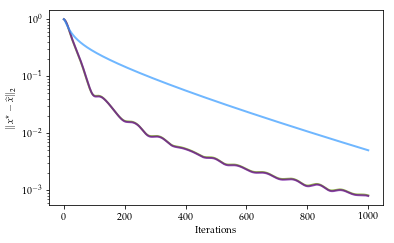

In [16]:
def f(y, A, x):
    return 0.5 * math.pow(la.norm(y - A @ x, 2), 2)

# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

# eta_GD = 1/(L + mu) 
# Compare 1/L + mu with 2/L + mu
# eta_GD = 1/L
eta_GD = 0.001

x_Nest1, x_list_Nest1, f_list_Nest1 = Nesterov1(y, A, eta_GD, iters, epsilon, True, x_star)
x_Nest2, x_list_Nest2, f_list_Nest2 = Nesterov2(y, A, eta_GD, iters, epsilon, True, x_star)
x_Nest3, x_list_Nest3, f_list_Nest3 = Nesterov3(y, A, eta_GD, L, mu, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_Nest1 = range(len(x_list_Nest1))
xs_Nest2 = range(len(x_list_Nest2))
xs_Nest3 = range(len(x_list_Nest3))

plt.plot(xs_Nest1, x_list_Nest1, '-', color = '#669900', linewidth = 2, alpha = 0.7)   # Green
plt.plot(xs_Nest2, x_list_Nest2, '-', color = '#660099', linewidth = 2, alpha = 0.7)   # Purple
plt.plot(xs_Nest3, x_list_Nest3, '-', color = '#3399FF', linewidth = 2, alpha = 0.7)     # Blue
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

### Learning rate/step size selections in SGD

In [17]:
def SGD(y, A, eta, b, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Select randomly an index
        j = np.random.randint(n, size = b)
    
        a = A[j, :]
        a_t = a.T
        
        # Compute gradient
        grad = - a_t.dot(y[j] - a.dot(x_new))
    
        # Perform gradient step
        x_new = x_old - eta * grad        
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list


In [31]:
def SGD1(y, A, b, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    

    x_list, f_list = [1], [f(y, A, x_new)]

    eta = 0.1
    
    for i in range(iters):
        x_old = x_new
    
        # Select randomly an index
        j = np.random.randint(n, size = b)
    
        a = A[j, :]
        a_t = a.T
        
        # Compute gradient
        grad = - a_t.dot(y[j] - a.dot(x_new))
    
        eta_t = eta * (1/(1 + i))
        
        # Perform gradient step
        x_new = x_old - eta_t * grad        
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list


In [36]:
def SGD2(y, A, b, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    

    x_list, f_list = [1], [f(y, A, x_new)]

    q = 0.5
    count = 0
    k = 10
    e = 0.1
    
    eta = 0.1
    eta_t = eta * math.pow(q, (1 + e)/k)
    
    for i in range(iters):
        x_old = x_new
        count += b
    
        if (count > n):
            e += 1
            eta_t = eta * math.pow(q, (1 + e)/k)

        # Select randomly an index
        j = np.random.randint(n, size = b)
    
        a = A[j, :]
        a_t = a.T
        
        # Compute gradient
        grad = - a_t.dot(y[j] - a.dot(x_new))
        
        # Perform gradient step
        x_new = x_old - eta_t * grad        
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list


iter# = 0, ||x_new - x_old||_2 = 0.24482413012541093
iter# = 1, ||x_new - x_old||_2 = 0.20717666311765756
iter# = 2, ||x_new - x_old||_2 = 0.20232731051008265
iter# = 3, ||x_new - x_old||_2 = 0.24272586777400681
iter# = 4, ||x_new - x_old||_2 = 0.2513163393676106
iter# = 5, ||x_new - x_old||_2 = 0.22266208567543794
iter# = 6, ||x_new - x_old||_2 = 0.19942050224307686
iter# = 7, ||x_new - x_old||_2 = 0.1887427406991628
iter# = 8, ||x_new - x_old||_2 = 0.1918040146478813
iter# = 9, ||x_new - x_old||_2 = 0.18523963852786768
iter# = 10, ||x_new - x_old||_2 = 0.16581794978326253
iter# = 11, ||x_new - x_old||_2 = 0.17203021987687778
iter# = 12, ||x_new - x_old||_2 = 0.1612779723284882
iter# = 13, ||x_new - x_old||_2 = 0.17934246649776872
iter# = 14, ||x_new - x_old||_2 = 0.18627867749116156
iter# = 15, ||x_new - x_old||_2 = 0.12390461586666973
iter# = 16, ||x_new - x_old||_2 = 0.14572382627637442
iter# = 17, ||x_new - x_old||_2 = 0.13528229466365135
iter# = 18, ||x_new - x_old||_2 = 0.131995

iter# = 292, ||x_new - x_old||_2 = 0.00537148898440761
iter# = 293, ||x_new - x_old||_2 = 0.005601913189372015
iter# = 294, ||x_new - x_old||_2 = 0.0048652349566166535
iter# = 295, ||x_new - x_old||_2 = 0.005764053872951951
iter# = 296, ||x_new - x_old||_2 = 0.006578715948134546
iter# = 297, ||x_new - x_old||_2 = 0.004926119895211537
iter# = 298, ||x_new - x_old||_2 = 0.005737432459752357
iter# = 299, ||x_new - x_old||_2 = 0.005850932017100409
iter# = 300, ||x_new - x_old||_2 = 0.006213181673978533
iter# = 301, ||x_new - x_old||_2 = 0.005599841085644299
iter# = 302, ||x_new - x_old||_2 = 0.00806961701354617
iter# = 303, ||x_new - x_old||_2 = 0.006180909149287852
iter# = 304, ||x_new - x_old||_2 = 0.0055208218486585605
iter# = 305, ||x_new - x_old||_2 = 0.007153839154107871
iter# = 306, ||x_new - x_old||_2 = 0.00543437664549727
iter# = 307, ||x_new - x_old||_2 = 0.005368416815500816
iter# = 308, ||x_new - x_old||_2 = 0.0039620286419748295
iter# = 309, ||x_new - x_old||_2 = 0.00675568256

iter# = 691, ||x_new - x_old||_2 = 0.0002590068367093132
iter# = 692, ||x_new - x_old||_2 = 0.0005258670628162613
iter# = 693, ||x_new - x_old||_2 = 0.0004878478269008636
iter# = 694, ||x_new - x_old||_2 = 0.0003672969133305984
iter# = 695, ||x_new - x_old||_2 = 0.00032092939807313665
iter# = 696, ||x_new - x_old||_2 = 0.00034354071474767834
iter# = 697, ||x_new - x_old||_2 = 0.00041709423158510435
iter# = 698, ||x_new - x_old||_2 = 0.0003296248429163391
iter# = 699, ||x_new - x_old||_2 = 0.0005926834157906845
iter# = 700, ||x_new - x_old||_2 = 0.00033628716720888406
iter# = 701, ||x_new - x_old||_2 = 0.00045449688033239057
iter# = 702, ||x_new - x_old||_2 = 0.0004297365732527145
iter# = 703, ||x_new - x_old||_2 = 0.00039639776900338993
iter# = 704, ||x_new - x_old||_2 = 0.00037649019014388344
iter# = 705, ||x_new - x_old||_2 = 0.0002221820835423918
iter# = 706, ||x_new - x_old||_2 = 0.0005799165128963504
iter# = 707, ||x_new - x_old||_2 = 0.0004984126493205926
iter# = 708, ||x_new - x

iter# = 143, ||x_new - x_old||_2 = 0.013445249971771128
iter# = 144, ||x_new - x_old||_2 = 0.020243912223501276
iter# = 145, ||x_new - x_old||_2 = 0.013530460781976684
iter# = 146, ||x_new - x_old||_2 = 0.01856996170097359
iter# = 147, ||x_new - x_old||_2 = 0.01341953217315229
iter# = 148, ||x_new - x_old||_2 = 0.018626281175402985
iter# = 149, ||x_new - x_old||_2 = 0.023928868991795752
iter# = 150, ||x_new - x_old||_2 = 0.016870481347696663
iter# = 151, ||x_new - x_old||_2 = 0.01369130157756205
iter# = 152, ||x_new - x_old||_2 = 0.009932415938951174
iter# = 153, ||x_new - x_old||_2 = 0.013576515522812256
iter# = 154, ||x_new - x_old||_2 = 0.011603339518335686
iter# = 155, ||x_new - x_old||_2 = 0.01054367785555848
iter# = 156, ||x_new - x_old||_2 = 0.010270492680536104
iter# = 157, ||x_new - x_old||_2 = 0.014668221217343812
iter# = 158, ||x_new - x_old||_2 = 0.018753864826653126
iter# = 159, ||x_new - x_old||_2 = 0.009103084313328713
iter# = 160, ||x_new - x_old||_2 = 0.012442388631435

iter# = 568, ||x_new - x_old||_2 = 0.001827517107519075
iter# = 569, ||x_new - x_old||_2 = 0.0038304657906509166
iter# = 570, ||x_new - x_old||_2 = 0.0026626040197129572
iter# = 571, ||x_new - x_old||_2 = 0.0015584325529841463
iter# = 572, ||x_new - x_old||_2 = 0.001855740336417246
iter# = 573, ||x_new - x_old||_2 = 0.0018607188341414505
iter# = 574, ||x_new - x_old||_2 = 0.004126233813580866
iter# = 575, ||x_new - x_old||_2 = 0.0017537957712136871
iter# = 576, ||x_new - x_old||_2 = 0.0023046064721380715
iter# = 577, ||x_new - x_old||_2 = 0.0025347489137053088
iter# = 578, ||x_new - x_old||_2 = 0.004249660971870496
iter# = 579, ||x_new - x_old||_2 = 0.002501483622971038
iter# = 580, ||x_new - x_old||_2 = 0.0022928760425675954
iter# = 581, ||x_new - x_old||_2 = 0.0027862685698789016
iter# = 582, ||x_new - x_old||_2 = 0.0017320148531244585
iter# = 583, ||x_new - x_old||_2 = 0.0018128419673396844
iter# = 584, ||x_new - x_old||_2 = 0.002829946669624318
iter# = 585, ||x_new - x_old||_2 = 0.

iter# = 4, ||x_new - x_old||_2 = 0.1691825378161722
iter# = 5, ||x_new - x_old||_2 = 0.16250274629574418
iter# = 6, ||x_new - x_old||_2 = 0.1526261486485592
iter# = 7, ||x_new - x_old||_2 = 0.2006734972732033
iter# = 8, ||x_new - x_old||_2 = 0.1370586500392285
iter# = 9, ||x_new - x_old||_2 = 0.1368914718971556
iter# = 10, ||x_new - x_old||_2 = 0.14517683104736936
iter# = 11, ||x_new - x_old||_2 = 0.13699234505289368
iter# = 12, ||x_new - x_old||_2 = 0.19314027270213563
iter# = 13, ||x_new - x_old||_2 = 0.1464171683210816
iter# = 14, ||x_new - x_old||_2 = 0.1742391498582659
iter# = 15, ||x_new - x_old||_2 = 0.1425967546833711
iter# = 16, ||x_new - x_old||_2 = 0.12872500253270333
iter# = 17, ||x_new - x_old||_2 = 0.13485472347255964
iter# = 18, ||x_new - x_old||_2 = 0.11586350230088478
iter# = 19, ||x_new - x_old||_2 = 0.12240749002421358
iter# = 20, ||x_new - x_old||_2 = 0.10770983937790059
iter# = 21, ||x_new - x_old||_2 = 0.11180538579046204
iter# = 22, ||x_new - x_old||_2 = 0.088165

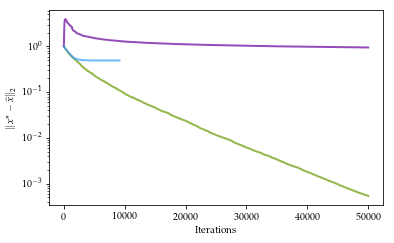

In [37]:
def f(y, A, x):
    return 0.5 * math.pow(la.norm(y - A @ x, 2), 2)

# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000
b = 50

eta_constant = 0.1

x_SGD1, x_list_SGD1, f_list_SGD1 = SGD(y, A, eta_constant, b, iters, epsilon, True, x_star)
x_SGD2, x_list_SGD2, f_list_SGD2 = SGD1(y, A, b, iters, epsilon, True, x_star)
x_SGD3, x_list_SGD3, f_list_SGD3 = SGD2(y, A, b, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs_SGD1 = range(0, len(x_list_SGD1)*50, 50)
xs_SGD2 = range(0, len(x_list_SGD2)*50, 50)
xs_SGD3 = range(0, len(x_list_SGD3)*50, 50)

plt.plot(xs_SGD1, x_list_SGD1, '-', color = '#669900', linewidth = 2, alpha = 0.7)   # Green
plt.plot(xs_SGD2, x_list_SGD2, '-', color = '#660099', linewidth = 2, alpha = 0.7)   # Purple
plt.plot(xs_SGD3, x_list_SGD3, '-', color = '#3399FF', linewidth = 2, alpha = 0.7)     # Blue

plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()